In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from collections import Counter

In [2]:
img_height, img_width = 224, 224
batch_size = 128
ncategories = 6

In [4]:
data_dir = 'images/train'
datagen = ImageDataGenerator(validation_split=0.2)
flow_params = {
    'class_mode': 'categorical',
#     'color_mode': 'grayscale',
    'target_size': (img_height, img_width),
#     'batch_size': batch_size,
}
train_it = datagen.flow_from_directory(data_dir, subset='training', batch_size=2000, **flow_params)
test_it = datagen.flow_from_directory(data_dir, subset='validation', batch_size=500, **flow_params)

Found 14400 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.


In [5]:
Xtrain, ytrain = train_it.next()
Xtest, ytest= test_it.next()

In [6]:
np.savez('data.npz', Xtrain, ytrain, Xtest, ytest)

(array([0., 0., 0., 0., 0., 1.], dtype=float32), 5)

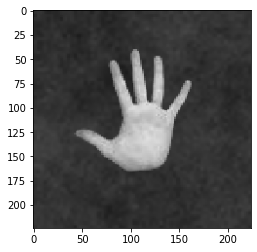

In [5]:
i = 0
plt.imshow(Xtrain[i].astype(np.uint8))
ytrain[i], ytrain[0].argmax()

In [6]:
 conv_model = keras.applications.MobileNetV2(
     alpha=0.25,
     weights=None,
     include_top=True,
     classes=ncategories,
     input_shape=(img_height, img_width, 3),
)
# pretrained_model.trainable = False
model = keras.Sequential([
    conv_model,
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), batch_size=batch_size, epochs=1)

In [9]:
def preprocess_image(img):
    img = cv2.resize(img, (img_width, img_height))
    return img

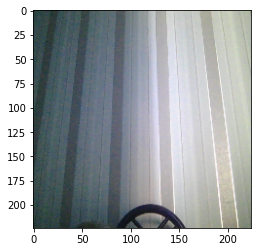

In [10]:
bg_img = preprocess_image(cv2.imread('background.png', cv2.IMREAD_COLOR))
plt.imshow(bg_img)
plt.show()

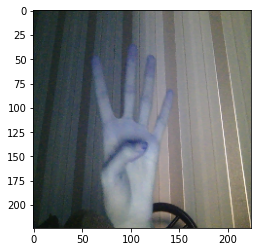

In [11]:
my_img_4 = preprocess_image(cv2.imread('test.png', cv2.IMREAD_COLOR))
plt.imshow(my_img_4)
plt.show()

In [12]:
predict = model.predict(np.expand_dims(my_img_4, axis=0))
predict.argmax(), predict, np.exp(predict[0])/np.exp(predict[0]).sum()

(0,
 array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]], dtype=float32),
 array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667], dtype=float32))

In [13]:
predict = model.predict(np.expand_dims(bg_img, axis=0))
predict.argmax(), predict, np.exp(predict[0])/np.exp(predict[0]).sum()

(0,
 array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]], dtype=float32),
 array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667], dtype=float32))

In [15]:
predict = model.predict(np.expand_dims(Xtrain[0], axis=0))
predict.argmax(), predict, np.exp(predict[0])/np.exp(predict[0]).sum()

(0,
 array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]], dtype=float32),
 array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667], dtype=float32))